In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv

In [2]:
AirBnB = pd.read_csv("../data/original_data/Listings.csv", engine='python', encoding='ISO-8859-1')

In [3]:
AirBnB.head()

,listing_id,name,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,...,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
0,281420,"Beautiful Flat in le Village Montmartre, Paris",1466919,2011-12-03,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
1,3705183,39 mÃÂ² Paris (Sacre CÃ âur),10328771,2013-11-29,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
2,4082273,"Lovely apartment with Terrace, 60m2",19252768,2014-07-31,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
3,4797344,Cosy studio (close to Eiffel tower),10668311,2013-12-17,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
4,4823489,Close to Eiffel Tower - Beautiful flat : 2 rooms,24837558,2014-12-14,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f


In [4]:
AirBnB.shape

(279712, 33)

In [5]:
AirBnB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279712 entries, 0 to 279711
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   listing_id                   279712 non-null  int64  
 1   name                         279539 non-null  object 
 2   host_id                      279712 non-null  int64  
 3   host_since                   279547 non-null  object 
 4   host_location                278872 non-null  object 
 5   host_response_time           150930 non-null  object 
 6   host_response_rate           150930 non-null  float64
 7   host_acceptance_rate         166625 non-null  float64
 8   host_is_superhost            279547 non-null  object 
 9   host_total_listings_count    279547 non-null  float64
 10  host_has_profile_pic         279547 non-null  object 
 11  host_identity_verified       279547 non-null  object 
 12  neighbourhood                279712 non-null  object 
 13 

`price` is our target column that we will want to try and predict. The rest of the columns are potential features.

Now let's look at the number and % of missing values in our dataset.

In [6]:
missing = pd.concat([AirBnB.isnull().sum(), 100 * AirBnB.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by='count', ascending=False)

,count,%
district,242700,86.767818
host_response_time,128782,46.040928
host_response_rate,128782,46.040928
host_acceptance_rate,113087,40.429799
review_scores_value,91785,32.814109
review_scores_location,91775,32.810534
review_scores_checkin,91771,32.809104
review_scores_accuracy,91713,32.788368
review_scores_communication,91687,32.779073
review_scores_cleanliness,91665,32.771208


Looks like we are missing the majority (over 86%) of the `district` column. Since we have a `city`, a `neighbourhood` and coordinate columns (`latitude` and `longitude`), we should be able to safely drop the `district` column without losing much information. We are missing about a third of all the review related columns and over 40% and 46% of the `host_acceptance_rate` column and `host_response_rate` column (as well as `host_response_time` column) respectively. We will decide what we want to do with these columns/missing values in the future. We are not missing any of our target column, `price`, which is ideal.

In [7]:
AirBnB.district.value_counts()

Manhattan        16553
Brooklyn         14474
Queens            4704
Bronx              992
Staten Island      289
Name: district, dtype: int64

In [8]:
AirBnB.district.value_counts().sum()

37012

In [9]:
AirBnB[AirBnB['city'] == 'New York'].neighbourhood.value_counts()

Williamsburg          2733
Bedford-Stuyvesant    2711
Harlem                1972
Bushwick              1678
Hell's Kitchen        1506
                      ... 
Huguenot                 1
Woodrow                  1
Lighthouse Hill          1
Willowbrook              1
Castle Hill              1
Name: neighbourhood, Length: 220, dtype: int64

In [10]:
AirBnB[AirBnB['city'] == 'New York'].neighbourhood.value_counts().sum()

37012

With all of these districts being only in New York, we can definitely drop this column because it is not providing any extra information that isn't captured by the more specific `neighbourhood` column.

In [11]:
AirBnB = AirBnB.drop('district', axis=1)

Let's have a look at the rows of our dataframe and see if there are any duplicates.

In [12]:
#number of rows duplicated
AirBnB.duplicated().sum()

0

There are no rows that are completely duplicated. What if we ignore the `listing_id` column? 

In [13]:
#rows that are duplicated (except for first instance) when not including listing_id 
dup_rows = AirBnB[AirBnB.drop('listing_id', axis=1).duplicated()]
dup_rows.head()

,listing_id,name,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,...,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
66632,47935047,Moderno depto con excelentes amenidades,368595849,2020-09-21,"Mexico City, Mexico City, Mexico",within an hour,1.0,0.93,t,5.0,...,5,1125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f
103516,17971704,Triple room nicely located beside Sultanahmet,110791987,2017-01-10,TR,within an hour,1.0,1.00,f,9.0,...,2,1125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t
103532,24661335,Family room nicely located beside Sultanahmet,110791987,2017-01-10,TR,within an hour,1.0,1.00,f,9.0,...,2,1125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t
103533,24661423,Triple room nicely located beside Sultanahmet,110791987,2017-01-10,TR,within an hour,1.0,1.00,f,9.0,...,2,1125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t
104081,24661841,Double room nicely located beside Sultanahmet,110791987,2017-01-10,TR,within an hour,1.0,1.00,f,9.0,...,2,1125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t


In [14]:
len(dup_rows)

27

In [15]:
#rows that are duplicated on sepcific columns (except for first instance) when not including listing_id 
partial_dup_rows = AirBnB[AirBnB.drop('listing_id', axis=1).duplicated(['name', 'host_id', 'latitude', 'longitude'])]
partial_dup_rows.head()

,listing_id,name,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,...,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
39441,43517742,Super apartment Bastille/Voltaire MOBILITY LEASE,325882341,2020-01-09,FR,within a few hours,0.98,0.80,f,279.0,...,30,1125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f
45214,39211052,Louvre - Richelieu: cosy flat for 2,50978178,2015-12-10,FR,within a few hours,0.73,0.94,f,155.0,...,1,1125,50.0,6.0,9.0,8.0,6.0,9.0,5.0,f
45219,39221386,Louvre - Richelieu: cosy flat for 2,50978178,2015-12-10,FR,within a few hours,0.73,0.94,f,155.0,...,1,1125,72.0,8.0,9.0,8.0,8.0,10.0,8.0,f
48233,41026321,Amazing apartment - 6P/2BR - Canal Saint Martin,319257358,2019-12-20,"Paris, Ile-de-France, France",within an hour,0.99,0.96,f,7.0,...,1,1125,92.0,9.0,9.0,8.0,9.0,10.0,9.0,t
53728,6671646,Central Apartment with 24/7 Concierge (1 guest),29087393,2015-03-10,"Rome, Lazio, Italy",NaN,NaN,NaN,f,9.0,...,1,1125,80.0,8.0,9.0,9.0,9.0,8.0,8.0,f


In [16]:
len(partial_dup_rows)

356

We can see that only 27 rows have the same information when not including the `listing_id` column. However, there are 356 columns where the name, host, latitude and longitude are the same. 

Since all of these rows have different listing ids, however, it is possible that they are listings that were taken down and put back up at a later date for whatever reason, and therefore given a new listing id. This could be from a customer making changes to the property and wanting to change the price while also not wanting old reviews to be associated with the listing. 

Therefore, I am  going to keep these rows since it won't really impact our models and they might be able to learn something from this customer behavior. 

Let's tackle the numeric features of our dataset.

In [17]:
AirBnB.describe().T

,count,mean,std,min,25%,50%,75%,max
listing_id,279712.0,2.638196e+07,1.442576e+07,2577.00000,1.384462e+07,2.767098e+07,3.978485e+07,4.834353e+07
host_id,279712.0,1.081658e+08,1.108570e+08,1822.00000,1.720656e+07,5.826911e+07,1.832853e+08,3.901874e+08
host_response_rate,150930.0,8.659386e-01,2.837443e-01,0.00000,9.000000e-01,1.000000e+00,1.000000e+00,1.000000e+00
host_acceptance_rate,166625.0,8.271684e-01,2.892025e-01,0.00000,7.800000e-01,9.800000e-01,1.000000e+00,1.000000e+00
host_total_listings_count,279547.0,2.458161e+01,2.840411e+02,0.00000,1.000000e+00,1.000000e+00,4.000000e+00,7.235000e+03
latitude,279712.0,1.876186e+01,3.256034e+01,-34.26440,-2.296439e+01,4.071079e+01,4.190861e+01,4.890491e+01
longitude,279712.0,1.259508e+01,7.308131e+01,-99.33963,-4.319804e+01,2.382780e+00,2.898673e+01,1.513398e+02
accommodates,279712.0,3.288736e+00,2.133379e+00,0.00000,2.000000e+00,2.000000e+00,4.000000e+00,1.600000e+01
bedrooms,250277.0,1.515509e+00,1.153080e+00,1.00000,1.000000e+00,1.000000e+00,2.000000e+00,5.000000e+01
price,279712.0,6.087927e+02,3.441827e+03,0.00000,7.500000e+01,1.500000e+02,4.740000e+02,6.252160e+05


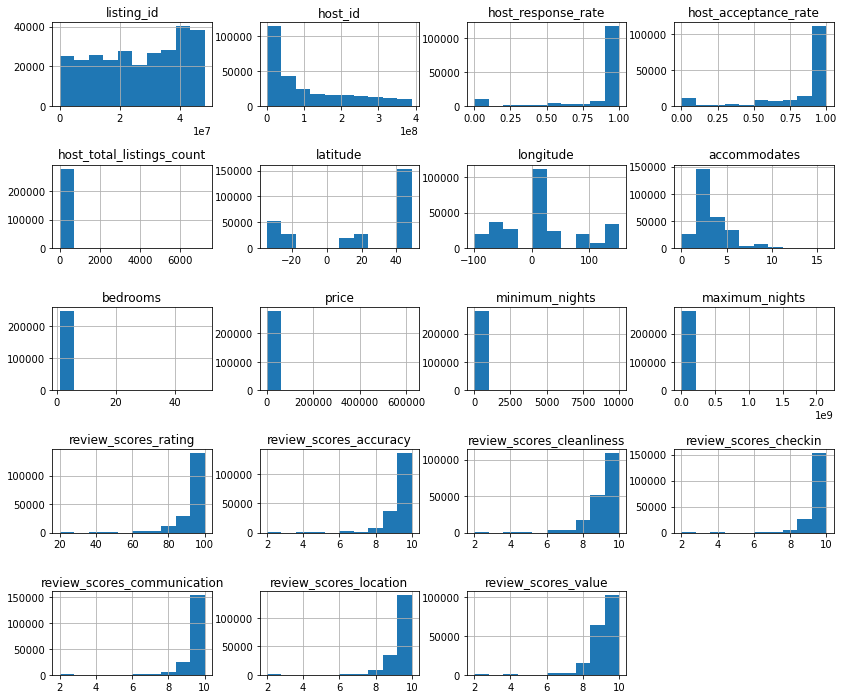

In [18]:
AirBnB.hist(figsize = (14,12))
plt.subplots_adjust(hspace=0.7);

The histogram for the following features are a little concerning:
- `host_acceptance_rate` looks like there could be some 0 values which would not make sense,
- `host_total_listings_count` because values are clustered down the lower end,
- `bedrooms` for the same reason,
- `price` for the same reason,
- `minimum_nights` for the same reason,
- `maximum_nights` for the same reason but also because there could be some 0 values which would not make sense.

In [19]:
AirBnB.host_acceptance_rate[AirBnB.host_acceptance_rate == 0].count()

11431

In [20]:
AirBnB.host_acceptance_rate.value_counts()

1.00    75555
0.00    11431
0.99     7227
0.50     5445
0.98     5085
        ...  
0.05       28
0.01       25
0.21       23
0.02       14
0.16        4
Name: host_acceptance_rate, Length: 101, dtype: int64

In [21]:
print("median host acceptance rate: %.2f" %AirBnB.host_acceptance_rate.median())
print("mean host acceptance rate: %f" %AirBnB.host_acceptance_rate.mean())

median host acceptance rate: 0.98
mean host acceptance rate: 0.827168


In [22]:
print("median host acceptance rate not including 0 values: %.2f" %AirBnB.host_acceptance_rate[AirBnB.host_acceptance_rate > 0].median())
print("mean host acceptance rate not including 0 values: %f" %AirBnB.host_acceptance_rate[AirBnB.host_acceptance_rate > 0].mean())

median host acceptance rate not including 0 values: 0.99
mean host acceptance rate not including 0 values: 0.888095


In [23]:
AirBnB[AirBnB.host_acceptance_rate == 0].head()

,listing_id,name,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,...,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
10720,739559,Nice studio in Montmartre,2638478,2012-06-14,"Paris, Ile-de-France, France",NaN,NaN,0.0,f,1.0,...,1,1125,93.0,NaN,NaN,NaN,NaN,NaN,NaN,f
10721,1282556,Penthouse with view and terrace,6977773,2013-06-18,"Paris, Ile-de-France, France",NaN,NaN,0.0,f,1.0,...,4,1125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f
10722,1455666,Typical French flat - Bastille 50m2,5547857,2013-03-20,"Paris, Ile-de-France, France",NaN,NaN,0.0,f,1.0,...,1,1125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f
10725,3276771,"CHARMING 2 ROOMS. MONTMARTRE, 35m2",16565834,2014-06-09,"Paris, Ile-de-France, France",NaN,NaN,0.0,f,1.0,...,6,1125,77.0,9.0,9.0,8.0,8.0,9.0,9.0,f
10726,3758451,Magnifique appartement Lumineux & Calme,9498528,2013-10-18,"Paris, Ile-de-France, France",NaN,NaN,0.0,f,1.0,...,2,1125,70.0,7.0,7.0,8.0,9.0,9.0,8.0,f


Not sure whether to impute the 0 values and/or all the NaN values in the `host_acceptance rate` column, or if I should just drop the the whole column since over 40% of the column is null or 0. 

Moving on to `host_total_listing_count` :

In [24]:
AirBnB.host_total_listings_count[AirBnB.host_total_listings_count > 1000].value_counts()

7235.0    349
1337.0    268
1105.0    215
1005.0    188
1020.0     77
1813.0     66
1318.0     46
7218.0     43
1163.0     24
1507.0     13
2739.0     13
1449.0      7
1515.0      6
1827.0      5
1338.0      5
7211.0      4
1324.0      2
1360.0      1
Name: host_total_listings_count, dtype: int64

Very large jump from 2739 to over 7000 listings. Even over a 1000 listings seems very large but it's not implausible for a company to have many properties listed on AirBnB (and some of the listings could be the same property as we have seen before). We will leave these values as is for now and maybe scale them down to a cutoff point in the future if we think this feature has a large affect on our models.

In [54]:
#check to see if there are any listings with 0 bedrooms
AirBnB.bedrooms[AirBnB.bedrooms == 0].count()

0

In [55]:
#checking for listings with more than 20 bedrooms
AirBnB.bedrooms[AirBnB.bedrooms > 20].value_counts()

50.0    22
40.0    10
22.0     5
30.0     4
23.0     4
24.0     4
33.0     3
31.0     2
39.0     2
38.0     2
46.0     2
21.0     2
35.0     2
26.0     1
25.0     1
34.0     1
42.0     1
41.0     1
48.0     1
Name: bedrooms, dtype: int64

In [56]:
#looking at listings with 50 bedrooms and how many people they accommodate
AirBnB[AirBnB.bedrooms == 50][['name','price', 'accommodates']]

,name,price,accommodates
44226,Ã¢ÅÂ¯ Amazing Midtown Suites for Home Office ...,3614,16
91807,BeylikdÃÂ¼zÃÂ¼nde ki eviniz.,214,16
92133,Ã¢ÅÂ¯ MASTER SUITES PRIME LOCATION Ã¢ÅÂ¯,1832,16
95290,Grand Ã Å¾ile Hotel,521,2
96185,Suite sencilla,600,2
96619,Ã¢ÂÂ¤ 25 SUITES - HOME OFFICE FOR COMPANY STA...,1858,16
97284,Kentin merkezinde tarihi yasayin...,100,1
97285,Tarihi surlar icinde sehrin tadini cikarin !!!,180,2
97294,Tarihi surlar icinde kenti yaÃ Å¸ayÃÂ±n!!!!,120,16
97365,Luxury villas at the beach,3000,16


Let's have a look at the Categorical features now.

In [25]:
# number of unique values in categorical columns
unique_cat_vals = AirBnB.select_dtypes('object').nunique()
unique_cat_vals

name                      265861
host_since                  4240
host_location               7159
host_response_time             4
host_is_superhost              2
host_has_profile_pic           2
host_identity_verified         2
neighbourhood                660
city                          10
property_type                144
room_type                      4
amenities                 245003
instant_bookable               2
dtype: int64

In [26]:
#number of unique values in categorical columns with less that 10 unique values 
small_unique_cat_vals = unique_cat_vals[np.where(unique_cat_vals < 10, True, False)]
small_unique_cat_vals

host_response_time        4
host_is_superhost         2
host_has_profile_pic      2
host_identity_verified    2
room_type                 4
instant_bookable          2
dtype: int64

In [27]:
#one-hot-encode the categorical columns with less than 10 unique values
dummy_AirBnB = pd.get_dummies(AirBnB, columns=small_unique_cat_vals.index, dummy_na=True, drop_first=True)

In [28]:
dummy_AirBnB.shape

(279712, 42)

In [29]:
dummy_AirBnB.select_dtypes(np.uint8).head()

,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour,host_response_time_nan,host_is_superhost_t,host_is_superhost_nan,host_has_profile_pic_t,host_has_profile_pic_nan,host_identity_verified_t,host_identity_verified_nan,room_type_Hotel room,room_type_Private room,room_type_Shared room,room_type_nan,instant_bookable_t,instant_bookable_nan
0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0


In [30]:
dummy_AirBnB.select_dtypes(np.uint8).shape

(279712, 16)

We've created 16 encoded columns and dropped the 6 original columns in our dummy DataFrame. Some models will want to use the dummy DataFrame while others will want to use the original one. This will depend on the models we choose (e.g. tree based models will not want to use the dummy DataFrame).

In [31]:
dummy_AirBnB.select_dtypes('object').nunique()

name             265861
host_since         4240
host_location      7159
neighbourhood       660
city                 10
property_type       144
amenities        245003
dtype: int64